### Problem Statement

In the context of customer churn prediction for a bank, the objective is to analyze and predict customer behavior to identify potential churners. The dataset contains information on bank customers, including demographic details, banking products held, credit history, and churn status. The goal is to build a predictive model that can effectively classify whether a customer is likely to churn based on available features.

#### Key Objectives:
1. **Data Exploration and Preprocessing:**
   - Perform exploratory data analysis to understand distributions, correlations, and patterns within the dataset.
   - Clean and preprocess the data by handling missing values, scaling numerical features, and encoding categorical variables.
      
3. **Model Building and Evaluation:**
   - Implement various machine learning algorithms (e.g., Logistic Regression, SVM, Random Forest) to train models on the dataset.
   - Evaluate model performance using appropriate metrics like accuracy, precision, recall, and F1-score.
   
4. **Handling Imbalanced Data:**
   - Address class imbalance using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to improve the model's ability to predict churn accurately.
   
5. **Deployment:**
   - Deploy the best-performing model to predict churn for new customer data.


In [57]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [58]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



### Dataset Column Descriptions

1. **CustomerId**: Unique identifier for each customer.

2. **CreditScore**: Numerical score based on customer's credit history and behavior.

3. **Geography**: Country where the customer resides.

4. **Gender**: Gender of the customer.

5. **Age**: Age of the customer in years.

6. **Tenure**: Number of years the customer has been with the bank.

7. **Balance**: Amount of money in the customer's bank account.

8. **NumOfProducts**: Number of bank products (e.g., accounts, loans) held by the customer.

9. **HasCrCard**: Whether the customer has a credit card (1 = Yes, 0 = No).

10. **IsActiveMember**: Whether the customer is an active member of the bank (1 = Yes, 0 = No).

11. **EstimatedSalary**: Estimated annual salary of the customer.

12. **Exited**: Whether the customer churned (1 = Yes, 0 = No).

In [59]:
rc = df.shape
print(f"Number of rows: {rc[0]}\nNumber of Columns: {rc[1]}")

Number of rows: 10000
Number of Columns: 14


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [61]:
# Check for missing values
print(df.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [62]:
# statistics summary of the data
print(df.iloc[:, 2:].describe())

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769 

In [63]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [64]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [65]:
print(df["Geography"].unique())

['France' 'Spain' 'Germany']


In [66]:
def cat_to_num(x):
    dic = {"France": 1, "Spain": 2, "Germany": 3}
    return dic.get(x, x)

def gen_to_num(x):
    dic = {"Female": 1, "Male": 2}
    return dic.get(x, x)


In [67]:
df["Geography"] = df["Geography"].apply(cat_to_num)
df["Gender"] = df["Gender"].apply(gen_to_num)


In [68]:
print(df["Geography"].value_counts())
print(df["Gender"].value_counts())
print(df.head())


Geography
1    5014
3    2509
2    2477
Name: count, dtype: int64
Gender
2    5457
1    4543
Name: count, dtype: int64
   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          1       1   42       2       0.00              1   
1          608          2       1   41       1   83807.86              1   
2          502          1       1   42       8  159660.80              3   
3          699          1       1   39       1       0.00              2   
4          850          2       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [69]:
print(df["Exited"].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


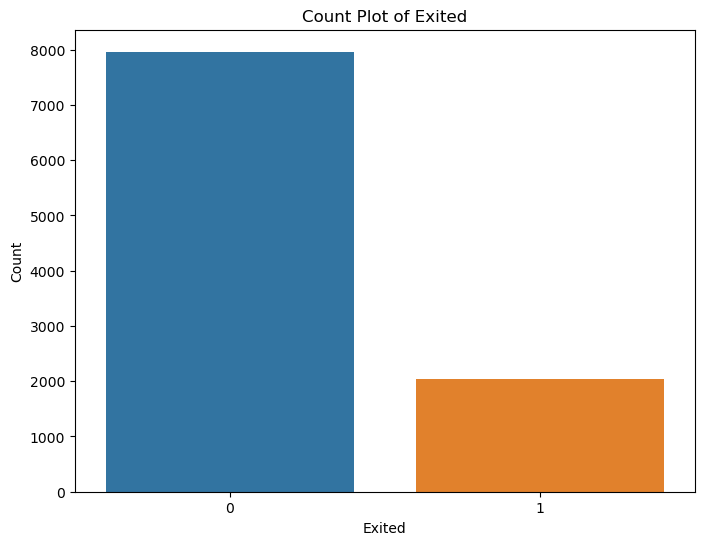

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Exited", data=df)
plt.title('Count Plot of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()


In [71]:
x = df.drop("Exited", axis=1)
y = df["Exited"]

In [72]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2, stratify=y)

In [73]:
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [74]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [75]:
ypred = lr.predict(xtest)

In [76]:
print("Accuracy score before SMOTE:", accuracy_score(ytest, ypred))
print("Classification report before SMOTE:\n", classification_report(ytest, ypred))


Accuracy score before SMOTE: 0.81
Classification report before SMOTE:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.61      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [77]:
# Handle imbalanced data with SMOTE
x_res, y_res = SMOTE().fit_resample(x, y)
print(y_res.value_counts())

Exited
1    7963
0    7963
Name: count, dtype: int64


In [78]:
# Split the resampled data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_res, y_res, random_state=42, test_size=0.2)

In [79]:
# Standardize the features again after resampling
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [80]:
def fit_and_evaluate(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy=accuracy_score(ytest, ypred)
    classification=classification_report(ytest, ypred)
    return accuracy,classification

LogisticRegression

In [81]:
accuracy,classification=fit_and_evaluate(LogisticRegression())
print(f"Accuracy score after SMOTE: {accuracy}")
print(f"Classification report after SMOTE:\n{classification}")

Accuracy score after SMOTE: 0.7715003138731952
Classification report after SMOTE:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1633
           1       0.75      0.79      0.77      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



Support Vector Classifier (SVC) 

In [82]:
accuracy,classification=fit_and_evaluate(SVC())
print(f"Accuracy score after SMOTE: {accuracy}")
print(f"Classification report after SMOTE:\n{classification}")

Accuracy score after SMOTE: 0.8305084745762712
Classification report after SMOTE:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1633
           1       0.82      0.84      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



KNeighborsClassifier

In [83]:
accuracy,classification=fit_and_evaluate(KNeighborsClassifier())
print(f"Accuracy score after SMOTE: {accuracy}")
print(f"Classification report after SMOTE:\n{classification}")

Accuracy score after SMOTE: 0.8123038292529818
Classification report after SMOTE:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1633
           1       0.79      0.84      0.81      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



DecisionTreeClassifier

In [84]:
accuracy,classification=fit_and_evaluate(DecisionTreeClassifier())
print(f"Accuracy score after SMOTE: {accuracy}")
print(f"Classification report after SMOTE:\n{classification}")

Accuracy score after SMOTE: 0.778405524168236
Classification report after SMOTE:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1633
           1       0.75      0.81      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



RandomForestClassifier

In [85]:
accuracy,classification=fit_and_evaluate(RandomForestClassifier())
print(f"Accuracy score after SMOTE: {accuracy}")
print(f"Classification report after SMOTE:\n{classification}")

Accuracy score after SMOTE: 0.8565599497802887
Classification report after SMOTE:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1633
           1       0.84      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



GradientBoostingClassifier

In [86]:
accuracy,classification=fit_and_evaluate(GradientBoostingClassifier())
print(f"Accuracy score after SMOTE: {accuracy}")
print(f"Classification report after SMOTE:\n{classification}")

Accuracy score after SMOTE: 0.8339610797237916
Classification report after SMOTE:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1633
           1       0.83      0.83      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



In [87]:
# Initialize models
models = {
    'LR': LogisticRegression(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'GBC': GradientBoostingClassifier()
}

# Evaluate models and collect results
results = {'Models': [], 'Accuracy': []}

for name, model in models.items():
    accuracy,_ = fit_and_evaluate(model)
    
    results['Models'].append(name)
    results['Accuracy'].append(accuracy)

# Create final_data DataFrame
final_data = pd.DataFrame(results)
final_data



,Models,Accuracy
0,LR,0.771500
1,SVC,0.830508
2,KNN,0.812304
3,DT,0.777464
4,RF,0.860013
5,GBC,0.833961


visualising models accuracy

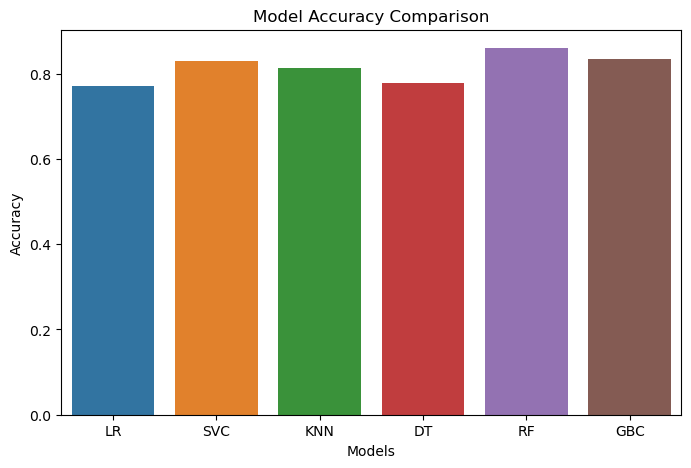

In [88]:
plt.figure(figsize=(8,5))
sns.barplot(x="Models", y="Accuracy", data=final_data)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

### Finalizing the model 

**Based on the analysis of model accuracies, the Random Forest classifier emerges as the most suitable choice for this project. It demonstrates a high accuracy rate of 85% according to the visualizations of the model performances. This makes it a robust candidate for handling the complexities and nuances of the dataset, providing reliable predictions for the intended application.**


In [89]:
rf=RandomForestClassifier()

In [90]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [91]:
import joblib

In [92]:
joblib.dump(rf,"churn_predict_model")

Making Predictions:

In [93]:
df[1:3]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1


In [94]:
sample_data = {
    'CreditScore': [608],
    'Geography': [2],
    'Gender': [1],
    'Age': [41],
    'Tenure': [1],
    'Balance': [83807.86],
    'NumOfProducts': [1],
    'HasCrCard': [0],
    'IsActiveMember': [1],
    'EstimatedSalary': [112542.58]
}

# Create DataFrame without feature names
df3 = pd.DataFrame(sample_data)

# Display the DataFrame
df3


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,608,2,1,41,1,83807.86,1,0,1,112542.58


In [95]:
res=rf.predict(df3)
if res[0]==1:
    print("Churned")
else:
    print("Not Churned")


Not Churned


In [96]:
sample_data2 = {
    'CreditScore': [502],
    'Geography': [1],
    'Gender': [1],
    'Age': [42],
    'Tenure': [8],
    'Balance': [159660.80],
    'NumOfProducts': [3],
    'HasCrCard': [1],
    'IsActiveMember': [0],
    'EstimatedSalary': [113931.57]
}

df2=pd.DataFrame(sample_data2)


In [97]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,502,1,1,42,8,159660.8,3,1,0,113931.57


In [98]:
res=rf.predict(df2)
if res[0]==1:
    print("Churned")
else:
    print("Not Churned")


Churned


### Conclusion

**After evaluating several machine learning models, including Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Gradient Boosting classifiers, we found that the Random Forest classifier performed the best. It achieved an accuracy of approximately 85% after handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).**

**The Random Forest model not only provided high accuracy but also demonstrated robust performance across various evaluation metrics such as precision, recall, and F1-score. This makes it a reliable choice for predicting customer churn based on the dataset's features.**

**In conclusion, deploying the Random Forest classifier trained on this dataset would enable the bank to proactively identify customers at risk of churning. By leveraging these insights, the bank can implement targeted retention strategies to improve customer retention rates and overall satisfaction.**